In [1]:
import os
import tensorflow as tf
import numpy as np
import visualize

In [2]:
from detection.datasets import coco, data_generator
from detection.datasets.utils import get_original_image

In [3]:
img_mean = (123.675, 116.28, 103.53)
# img_std = (58.395, 57.12, 57.375)
img_std = (1., 1., 1.)

In [4]:
train_dataset = coco.CocoDataSet('/workspace/shared_workspace/data/coco', 'train',
                                 flip_ratio=0.5,
                                 pad_mode='fixed',
                                 mean=img_mean,
                                 std=img_std,
                                 scale=(800, 1216))

train_generator = data_generator.DataGenerator(train_dataset)


loading annotations into memory...
Done (t=13.87s)
creating index...
index created!


In [5]:
img, img_meta, bboxes, labels = train_dataset[0]

rgb_img = np.round(img + img_mean)
ori_img = get_original_image(img, img_meta, img_mean)

#visualize.display_instances(rgb_img, bboxes, labels, train_dataset.get_categories())

In [6]:
from detection.models.detectors import faster_rcnn

model = faster_rcnn.FasterRCNN(
    num_classes=len(train_dataset.get_categories()))

In [7]:
batch_imgs = tf.Variable(np.expand_dims(img, 0))
batch_metas = tf.Variable(np.expand_dims(img_meta, 0))

_ = model((batch_imgs, batch_metas), training=False)

In [8]:
model.layers[0].trainable=False

In [10]:
model.load_weights( \
'/workspace/shared_workspace/tf-eager-fasterrcnn/rcnn101_sgdw_training_epoch_1.h5', by_name=True)

In [11]:
proposals = model.simple_test_rpn(img, img_meta)
res = model.simple_test_bboxes(img, img_meta, proposals)

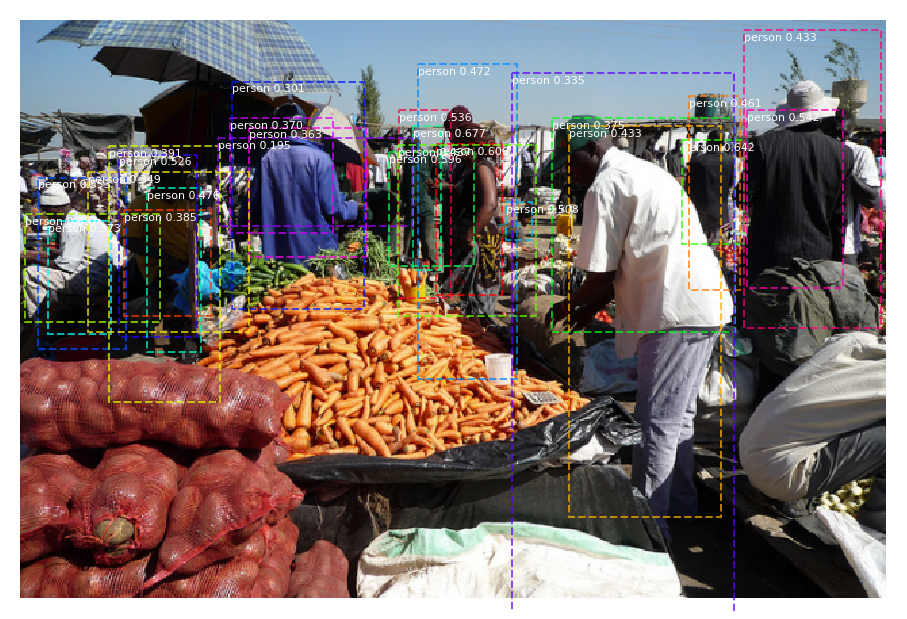

In [12]:
visualize.display_instances(ori_img, res['rois'], res['class_ids'], 
                            train_dataset.get_categories(), scores=res['scores'])

In [ ]:
img, img_meta, bboxes, labels = train_dataset[np.random.randint(0, len(train_dataset))]

rgb_img = np.round(img + img_mean)
ori_img = get_original_image(img, img_meta, img_mean)
proposals = model.simple_test_rpn(img, img_meta)
res = model.simple_test_bboxes(img, img_meta, proposals)
print("Ground Truth")
visualize.display_instances(ori_img, bboxes/img_meta[-2], labels, 
                            train_dataset.get_categories())
print("Predictions")
visualize.display_instances(ori_img, res['rois'], res['class_ids'], 
                            train_dataset.get_categories(), scores=res['scores'])

In [85]:
val_dataset = coco.CocoDataSet('/workspace/shared_workspace/data/coco', 'val',
                                 flip_ratio=0.5,
                                 pad_mode='fixed',
                                 mean=img_mean,
                                 std=img_std,
                                 scale=(800, 1216))
val_generator = data_generator.DataGenerator(val_dataset)


loading annotations into memory...
Done (t=2.40s)
creating index...
index created!


Ground Truth


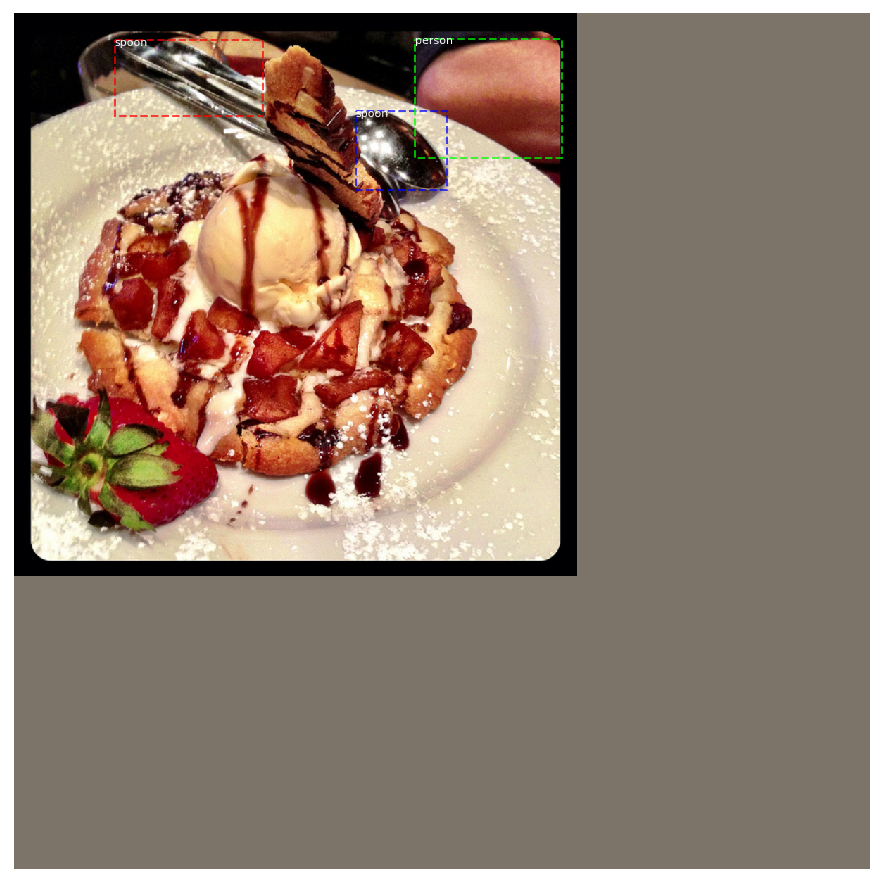

Predictions


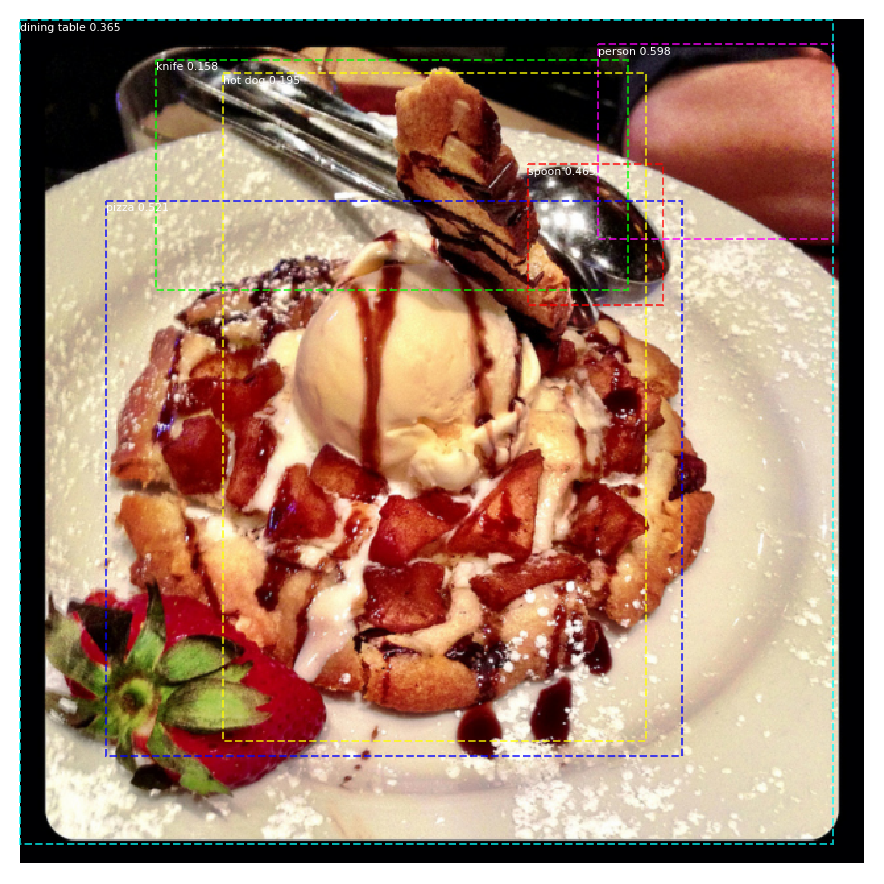

Ground Truth


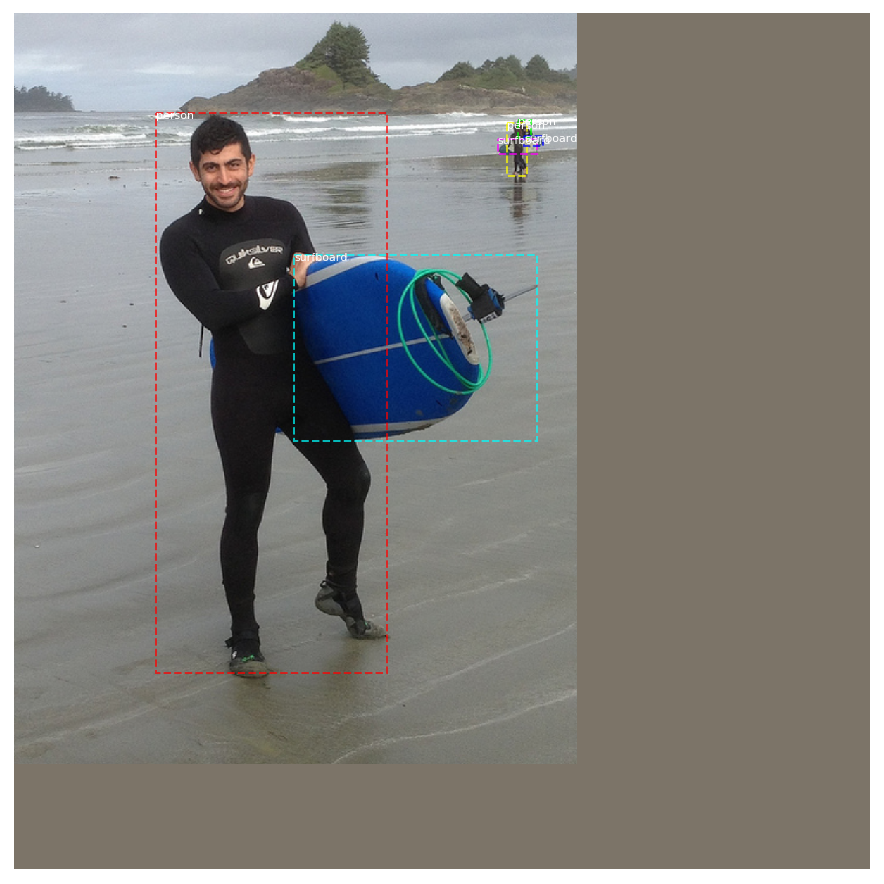

Predictions


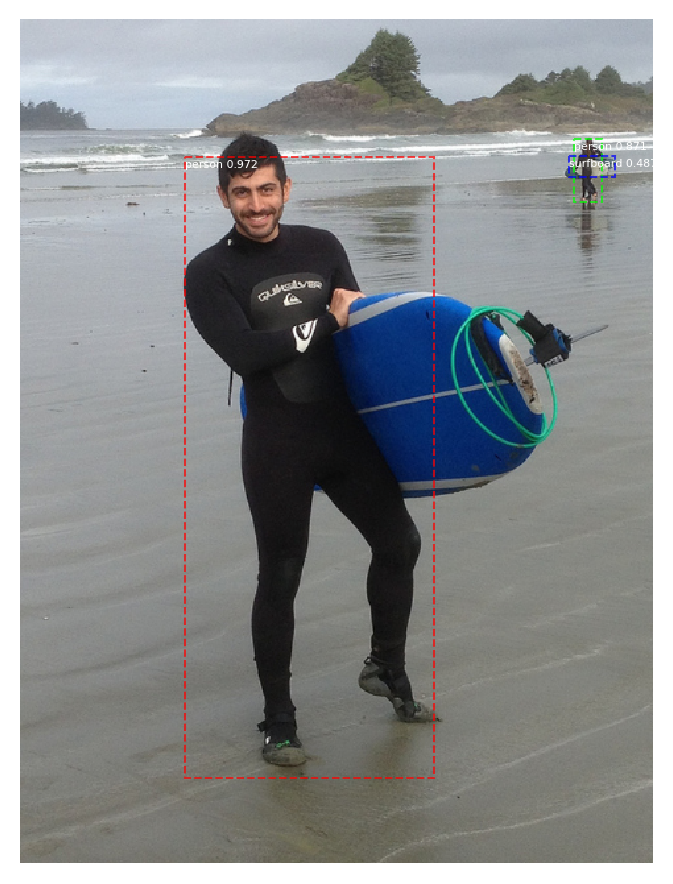

Ground Truth


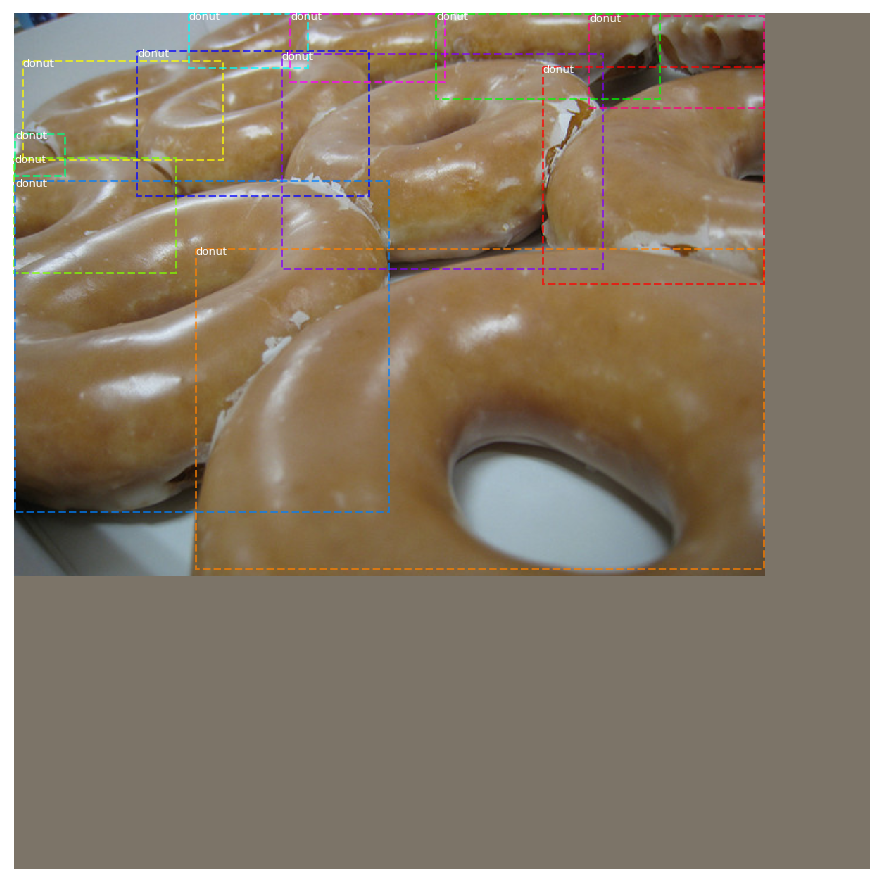

Predictions


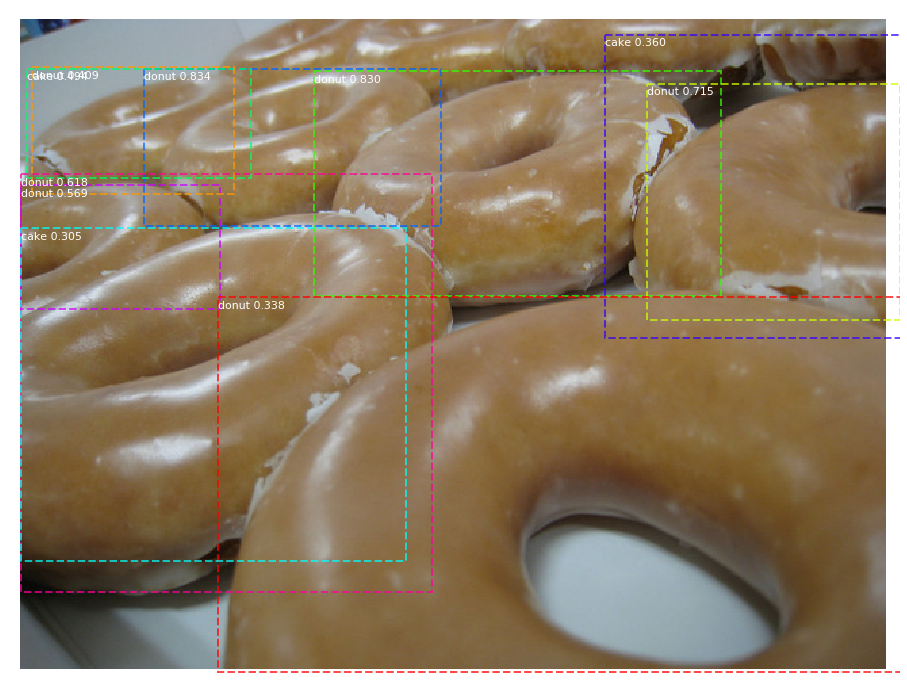

Ground Truth


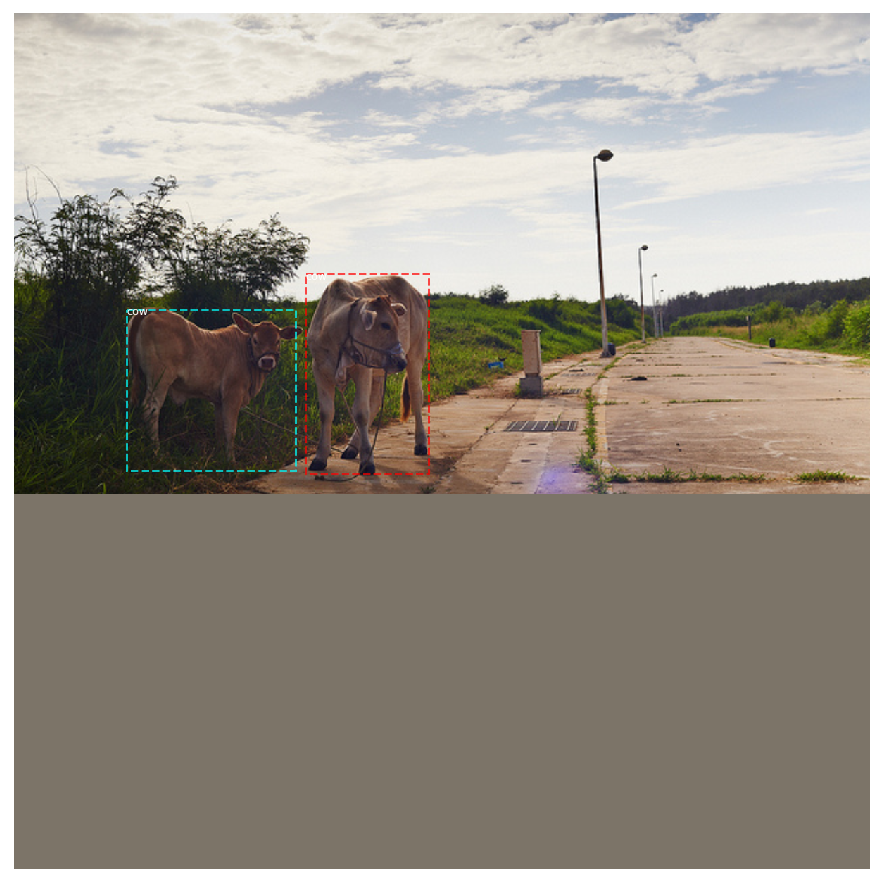

Predictions


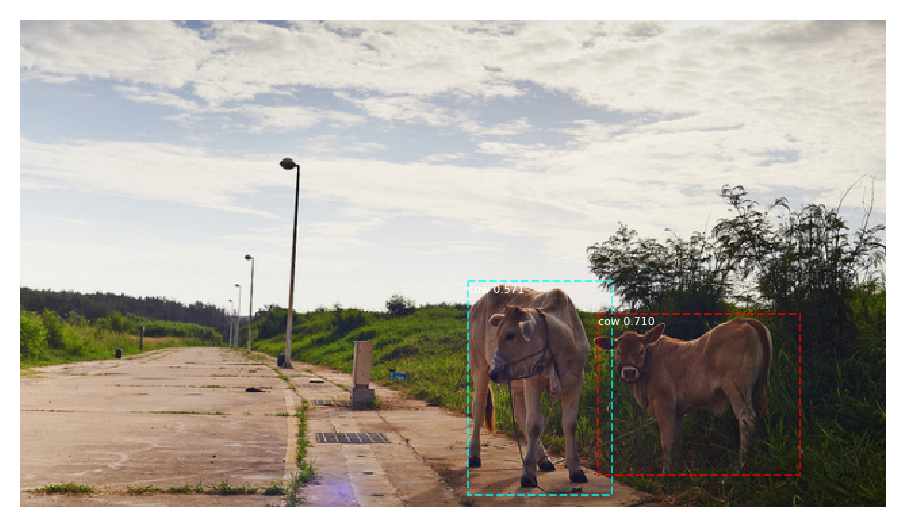

Ground Truth


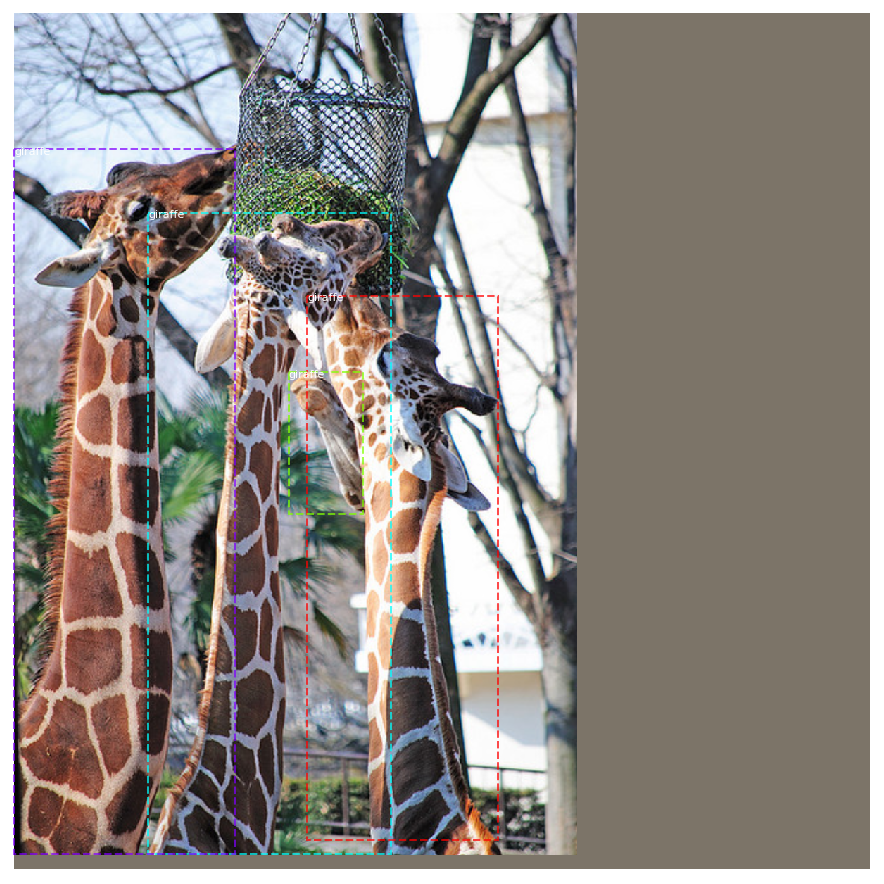

Predictions


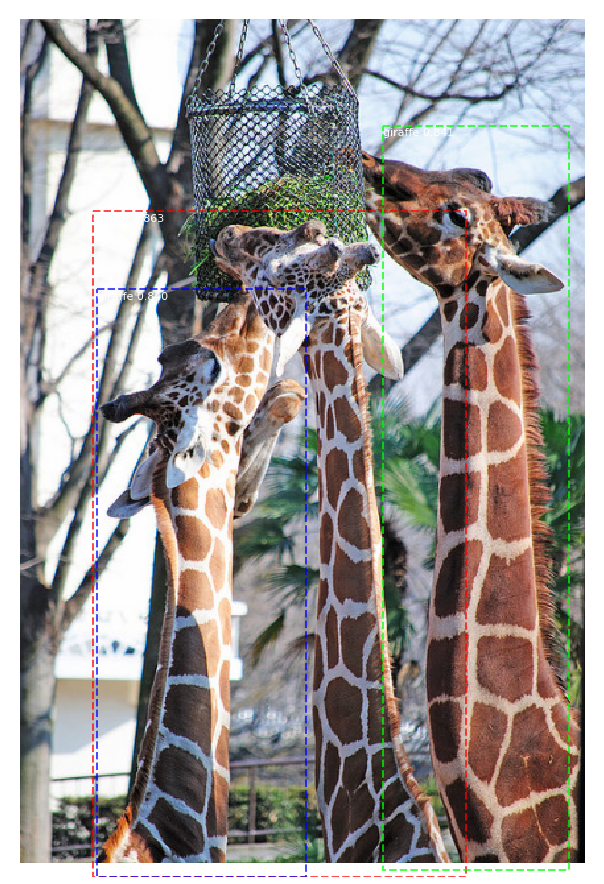

In [94]:
for _ in range(5):
    img, img_meta, bboxes, labels = val_dataset[np.random.randint(0, len(val_dataset))]

    rgb_img = np.round(img + img_mean)
    ori_img = get_original_image(img, img_meta, img_mean)
    proposals = model.simple_test_rpn(img, img_meta)
    res = model.simple_test_bboxes(img, img_meta, proposals)
    print("Ground Truth")
    visualize.display_instances(rgb_img, bboxes, labels, 
                                val_dataset.get_categories())
    print("Predictions")
    visualize.display_instances(ori_img, res['rois'], res['class_ids'], 
                                val_dataset.get_categories(), scores=res['scores'])